### `Introduction`

Video games have become very important in modern entertainment. From simple pixelated games to detailed reallistic games. Millions of people play video games regularly. There is a wide range of video games with different qualities. Some video games seem to be very popular, while others don't get much attention. These video games also come with a wide range of prices. Some video games are categorized as "triple A" games, which means that they should be high quality and thus come with a high price. A lot of other video games are categorized as "indie" games, which means they have a lower budget and are much more simple. 

In this data story we are going to explore the difference between triple A games and indie games. We are going to focus on the price and succes of video games. With the rising prices of video games our main question is: "Does the price of a video game influence the succes of a video game?" We define the succes of a video game in different factors such as sales, players and review scores. We will be comparing these factors to the price for both tiple A games and indie games. Our first perspective is that triple A games should be more succesfull than indie games since they have a higher budget, thus the quality should be better. Our second perspective is that indie games are cheaper and require less computational power so more people are able to afford and play the video game.

In [5]:
# Import packages
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
# import warnings
# warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np

### Price compared to amount of players


First of all we want to discover what the correlation between the price of a game and the amount of players that play the game is. Furthermore we want to explore the difference between AAA-games and Indie-games. To do so we have used the following dataset: https://www.kaggle.com/datasets/faisaljanjua0555/most-played-games-of-all-time combined with another dataset: https://www.kaggle.com/datasets/nikdavis/steam-store-games. In the first dataset "current" indicates the amount of players a game has right now, "24th peak" the amount of players a game had on it's 24th peak and "all time peak" the highest amount of players a game has ever had. To emphasize the difference between AAA-games and Indie-games, we have split the data into those two categories. These categories are again split into three subdivisons depended on the price of a game. The length of the bar is depended on the avarage amount of players over the games in the according category.


In [6]:
df1 = pd.read_csv('DATASETS/aaa_published_games.csv')
df1 = df1[['name', 'price']]
df2 = pd.read_csv('DATASETS/indie_published_games.csv')
df2 = df2[['name', 'price']]
df3 = pd.read_csv('DATASETS/player_count.csv')
df1 = df1.merge(df3, how='inner', on='name')
df2 = df2.merge(df3, how='inner', on='name')
df1['Type of game']='AAA'
df2['Type of game']='Indie'
df = df1.merge(df2, how='outer')
df = df.drop(columns=['Unnamed: 5'])

AAA = df[df["Type of game"]=='AAA']
AAA.loc[:, 'Current'] = pd.to_numeric(AAA['Current'], errors='coerce')
AAA.loc[:, '24th Peak'] = pd.to_numeric(AAA['24th Peak'], errors='coerce')
AAA.loc[:, 'All_time peak'] = pd.to_numeric(AAA['All_time peak'], errors='coerce')
AAA_price_categories = pd.qcut(AAA["price"], 3, retbins=True, labels=["Low", "Medium", "High"])
AAA['price_category'] = AAA_price_categories[0]

AAA_low = AAA[AAA["price_category"]=="Low"]
AAA_current_low = AAA_low['Current'].mean() 
AAA_24th_low = AAA_low['24th Peak'].mean()
AAA_all_time_low = AAA_low['All_time peak'].mean()

AAA_medium = AAA[AAA["price_category"]=="Medium"]
AAA_current_medium = AAA_medium['Current'].mean() 
AAA_24th_medium = AAA_medium['24th Peak'].mean()
AAA_all_time_medium = AAA_medium['All_time peak'].mean()

AAA_high = AAA[AAA["price_category"]=="High"]
AAA_current_high = AAA_high['Current'].mean() 
AAA_24th_high = AAA_high['24th Peak'].mean()
AAA_all_time_high = AAA_high['All_time peak'].mean()

Indie = df[df["Type of game"]=='Indie']
Indie.loc[:, 'Current'] = pd.to_numeric(Indie['Current'], errors='coerce')
Indie.loc[:, '24th Peak'] = pd.to_numeric(Indie['24th Peak'], errors='coerce')
Indie.loc[:, 'All_time peak'] = pd.to_numeric(Indie['All_time peak'], errors='coerce')
Indie_price_categories = pd.qcut(Indie["price"], 3, retbins=True, labels=["Low", "Medium", "High"])
Indie['price_category'] = Indie_price_categories[0]

Indie_low = Indie[Indie["price_category"]=="Low"]
Indie_current_low = Indie_low['Current'].mean() 
Indie_24th_low = Indie_low['24th Peak'].mean()
Indie_all_time_low = Indie_low['All_time peak'].mean()

Indie_medium = Indie[Indie["price_category"]=="Medium"]
Indie_current_medium = Indie_medium['Current'].mean() 
Indie_24th_medium = Indie_medium['24th Peak'].mean()
Indie_all_time_medium = Indie_medium['All_time peak'].mean()

Indie_high = Indie[Indie["price_category"]=="High"]
Indie_current_high = Indie_high['Current'].mean() 
Indie_24th_high = Indie_high['24th Peak'].mean()
Indie_all_time_high = Indie_high['All_time peak'].mean()

data = [['AAA low price', AAA_current_low, AAA_24th_low, AAA_all_time_low], ['AAA medium price', AAA_current_medium, AAA_24th_medium, AAA_all_time_medium], ['AAA high price', AAA_current_high, AAA_24th_high, AAA_all_time_high], ['Indie low price', Indie_current_low, Indie_24th_low, Indie_all_time_low], ['Indie medium price', Indie_current_medium, Indie_24th_medium, Indie_all_time_medium], ['Indie high price', Indie_current_high, Indie_24th_high, Indie_all_time_high]]
df = pd.DataFrame(data, columns=['Type of game', 'Current', '24th peak', 'All time peak'])

trace =[
    go.Bar(name='Current ', x = df['Type of game'], y = df['Current'], marker_color='rgb(102,194,165)'),
    go.Bar(name='24th peak', x = df['Type of game'], y = df['24th peak'], marker_color='rgb(252,141,98)'),
    go.Bar(name='All time peak', x = df['Type of game'], y = df['All time peak'], marker_color='rgb(141,160,203)'),
]

layout = go.Layout(
    xaxis=go.layout.XAxis(
        type='category'
    ),
    yaxis=go.layout.YAxis(
    )
)
fig = go.Figure(data=trace, layout=layout)
fig.update_layout(
    title_text='Number of players, based on the type of game and price category.',
    xaxis_title='Type of game',
    yaxis_title='Number of players',
    height=400
)
fig.show()

/tmp/ipykernel_41477/3770327433.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_41477/3770327433.py:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



You can draw some interesting conclusions based on the stacked barplot. The first thing that is remarkable is the fact that the amount of players that play AAA-games is overall a lot higher than the amount of players that play Indie games. A second interesting thing you may notice is the fact that the number of players is getting bigger when the price is getting higher, except for the AAA-games low price category. That means that people on avarage tend to play more expensive games, except when it comes to low price AAA-games. The 24th peak and current peak are also a lot higher for this category than they are for other categories. This indicates that players continue playing these games for a longer time than thay do with other games. Therefore low price AAA-games attract the most people for the longest time, which makes it the most popular type of game.

### Other Variables

Ofcourse there are a lot of reason why a game does better than others. Next will look at some variables that might be interesting

In [7]:
df1 = pd.read_csv('DATASETS/result.csv')
df1['name'] = df1['name'].str.lower().replace(r'\s+','',regex=True).replace(r':','',regex=True).replace(r'-','',regex=True)

df2 = pd.read_csv('DATASETS/vgsales.csv')
df2['name'] = df2['name'].str.lower().replace(r'\s+','',regex=True).replace(r':','',regex=True).replace(r'-','',regex=True)

df3 = pd.read_csv('DATASETS/steam.csv')
df3['name'] = df3['name'].str.lower().replace(r'\s+','',regex=True).replace(r':','',regex=True).replace(r'-','',regex=True)

df4 = pd.read_csv('../docs/DATASETS/steam_reviews_revenue.csv')
df4['name'] = df4['name'].str.lower().replace(r'\s+','',regex=True).replace(r':','',regex=True).replace(r'-','',regex=True)

df1.set_index('name', inplace=True)
df2.set_index('name', inplace=True)
df3.set_index('name', inplace=True)
df4.set_index('name', inplace=True)

df2.drop(columns='publisher', inplace=True)
df4.drop(columns=['appid','english','release_date','developer','publisher','platforms','required_age',
                  'categories','genres','steamspy_tags','achievements','positive_ratings','negative_ratings',
                  'average_playtime','median_playtime','owners','Unnamed: 0.1','Unnamed: 0'], inplace=True)

temp_df = df1.join(df2, on='name', how='inner',rsuffix=' - df2')
temp_df = temp_df.join(df3, on='name', how='inner',rsuffix=' - df3')
com_df = temp_df.join(df4, on='name', how='inner', rsuffix=' - df4').reset_index()

com_df = com_df[com_df['average_playtime'] > 0]

# pos neg ratio rating
com_df['ratio_rating'] = com_df['positive_ratings'] / (com_df['negative_ratings'] + com_df['positive_ratings'])

ratio_se = pd.qcut(com_df['ratio_rating'], q=4, retbins=True, labels=['0-25%','26-50%','51-75%','76-100%'])
com_df['ratio_bins'] = ratio_se[0]

# metascore 
# meta_se = pd.qcut(com_df['metascore'], q=5, retbins=True, labels=['very low','low','medium','high','very high']) # orginal
meta_se = pd.qcut(com_df['metascore'], q=3, retbins=True, labels=['low','medium','high']) # test

com_df['meta_bins'] = meta_se[0]

# owners
owners_bins = {
    '0-20000':'<200k',
    '20000-50000':'<200k',
    '50000-100000':'<200k',
    '100000-200000':'<200k',
    '200000-500000':'200k-1m',
    '500000-1000000':'200k-1m',
    '1000000-2000000':'1-5m',
    '2000000-5000000':'1-5m',
    '5000000-10000000':'>5m',
    '10000000-20000000':'>5m',
    '20000000-50000000':'>5m',
    '50000000-100000000':'>5m',
    '100000000-200000000':'>5m',
}
com_df['owners_bins'] = com_df['owners'].map(owners_bins,)

# consoles 
console_bins = {
    'PC':'PC',
    'PS4':'PSN',
    'XONE':'XBOX',
    'X360':'XBOX',
    'Switch':'Nintendo',
    'PS3':'PSN',
    'WIIU':'Nintendo',
    'XBOX':'XBOX',
    'VITA':'PSN',
    'PS2':'PSN',
    'WII':'Nintendo',
    'PSP':'PSN',
    '3DS':'Nintendo',
    'DS':'Nintendo',
    'GC':'Nintendo',
    'GBA':'Nintendo',
    'PS':'PSN',
    'DC':'Nintendo',
}
com_df['console_bins'] = com_df['console'].map(console_bins)

# price
price_se = pd.cut(com_df['Launch Price'],[-1,10,20,50,500],labels=['<10$','10-20$','20-50$','>50$'],retbins=True)
com_df['price_bins'] = price_se[0]

# playtime
playt_se = pd.cut(com_df['average_playtime'],[-1,20,200,500,100000],labels=['<20h','20-200h','200-500h','>500h'],retbins=True)
com_df['playt_bins'] = playt_se[0]
com_df['average_playtime'].value_counts()

# is AAA
AAA_bins = {
    1:'Triple A',
    0:'Not triple A'
}
com_df['AAA_bins'] = com_df['is_aaa'].map(AAA_bins)


low = '#FF6F9F'
medium = '#6F9FFF'
high = '#9FFF6F'

meta_colors = {
    'low':low,
    'medium':medium,
    'high':high,
}

data = go.Parcats(
    dimensions=[
        {'label':'Playtime',
         'values':com_df['playt_bins'],
         'categoryorder': 'array','categoryarray':['<20h','20-200h','200-500h','>500h']},
        
        {'label':'Launch Price',
         'values':com_df['price_bins'],
         'categoryorder': 'array','categoryarray':['<10$','10-20$','20-50$','>50$']},
        
        {'label':'Console',
         'values':com_df['console_bins']},

        {'label':'Owners',
         'values':com_df['owners_bins'],
         'categoryorder': 'array', 'categoryarray':['<200k','200k-1m','1-5m','>5m']},
        
        {'label':'Positive ratings',
         'values':com_df['ratio_bins'],
         'categoryorder': 'category descending'},
        
        {'label':'Metascore',
         'values':com_df['meta_bins'],
        #  'categoryorder': 'array', 'categoryarray':['very high','high','medium','low','very low']}, # orginal
         'categoryorder': 'array', 'categoryarray':['high','medium','low']}, # test


        {'label':'Classification',
         'values':com_df['AAA_bins']}
    ],
    # sortpaths='backward',
    hoveron = 'color',
    line={'color' : [meta_colors[meta] for meta in com_df['meta_bins']], 
          'shape':'hspline'}, # 'hspline' is nicer but slower
)

layout = go.Layout(
    title = 'Analysis of metascores for different variables',
    paper_bgcolor = '#E0E0E0',
    font={'color':'#003B4A'}
)

go.Figure(data=data, layout=layout).show()

In [8]:
df_rev = pd.read_csv('DATASETS/steam_reviews_revenue.csv')
rev_play = df_rev
rev_play = rev_play[rev_play['average_playtime'] < 4000]
rev_play = rev_play[rev_play['average_playtime'] > 50]
rev_play = rev_play[rev_play['Revenue Estimated'] < 2000000]
rev_play = rev_play[rev_play['Revenue Estimated'] > 500000]
rev_play['is_aaa2'] = rev_play['is_aaa']*4+1
rev_play['review_ratio_pow'] = rev_play['review_ratio']**4
fig = px.scatter(rev_play, x=rev_play['average_playtime'], y=rev_play['Revenue Estimated'], color= 'review_ratio_pow', size='is_aaa2', height=600, trendline='ols')
fig.show()

ModuleNotFoundError: No module named 'statsmodels'

A larger average playtime is only slightly related to a larger estimated revenue. \
There are more low-rated AAA games than there are low-rated indie games. \
Most of the high-earning indie games are highly-rated, whereas most high-earning AAA games are rated a bit lower.

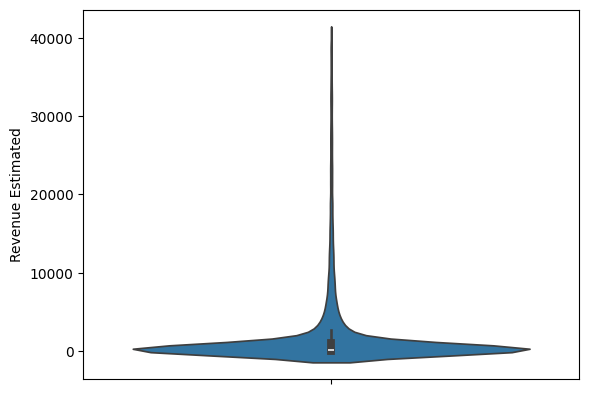

In [ ]:
indies = df_rev[df_rev['is_aaa'] == 0]
indies = indies[indies['Revenue Estimated'] < 40000]
g = sns.violinplot(data=indies, y='Revenue Estimated')

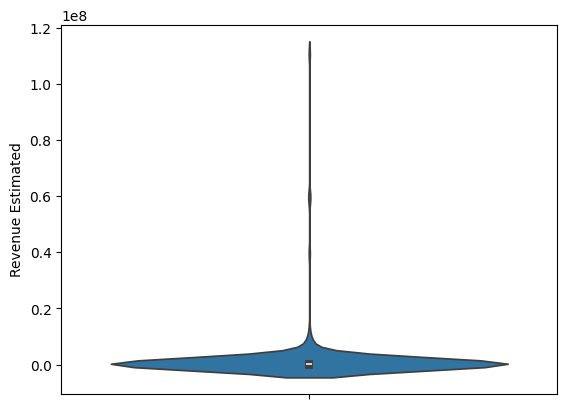

In [ ]:
aaa = df_rev[df_rev['is_aaa'] == 1]
h = sns.violinplot(data=aaa, y='Revenue Estimated')

The idea is to show that the majority of games do not perform exceptionally well (illustrated by the widest part of the graph sitting around the 0 mark). \
This visualisation does not explicitly show the fact that a AAA game which did 'not perform exceptionally well' makes significantly more money than an indie one.